<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# AG2 101 (AutoGen): Complete Tutorial

Estimated time needed: **45** minutes

This notebook provides a comprehensive guide to AG2 (formerly AutoGen) basic concepts with runnable examples and detailed explanations. AG2 is an open-source programming framework for building AI agents and facilitating cooperation among multiple agents to solve tasks.

## Table of Contents

<ol>
    <li><a href="#Setup-and-Import">Setup and Import</a></li>
    <li><a href="#Configure-API-Keys">Configure API Keys</a></li>
    <li>
        <a href="#Introduction-to-Agent-Concepts">Introduction to Agent Concepts</a>
        <ol>
            <li><a href="#Conversable-Agent">Conversable Agent</a></li>
            <li><a href="#Creating-Specialized-Agents">Creating Specialized Agents</a></li>
            <li><a href="#Built-in-Agent-Types">Built-in Agent Types</a></li>
        </ol>
    </li>
    <li><a href="#Human-in-the-Loop">Human-in-the-Loop</a></li>
    <li>
        <a href="#Agent-Orchestration-&-Multi-Agent-Systems-in-AG2">Agent Orchestration & Multi-Agent Systems in AG2</a>
        <ol>
            <li><a href="#GroupChat-and-GroupChatManager">GroupChat and GroupChatManager</a></li>
        </ol>
    </li>
    <li><a href="#Tools-and-Extensions">Tools and Extensions</a></li>
    <li><a href="#Structured-Outputs">Structured Outputs</a></li>
    <li><a href="#Best-Practices">Best Practices</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
    <li><a href="#Authors">Authors</a></li>
    
</ol>


## Setup and Import

Here we install AG2, import the required modules, and load the environment variables.  


In [3]:
%uv pip install ag2

Using Python 3.12.9 environment at: /Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv
Resolved 23 packages in 459ms                                        
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)--------------     0 B/860.53 KiB          
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 48.00 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 61.81 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 77.81 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 93.81 KiB/860.53 KiB        
⠙ Preparing packages... (0/1)-------------- 109.81 KiB/860.53 KiB       
⠙ Preparing packages... (0/1)-------------- 125.81 KiB/860.53 KiB       
⠙ Preparing packages... (0/1)-------------- 141.81 KiB/860.53 KiB       
⠙ Prep

In [4]:
# Import necessary modules
import os
from dotenv import load_dotenv
from autogen import ConversableAgent, AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager
from autogen.llm_config import LLMConfig
import json
import time
import random

# Load environment variables
load_dotenv()

print("AG2 modules imported successfully!")

AG2 modules imported successfully!


In [5]:
import logging

# Suppress API key format warning
logging.getLogger("autogen.oai.client").setLevel(logging.ERROR)

### Configure API Keys

Autogen supports various LLM providers. Let's set up configuration for OpenAI.  

**Note:** In this environment, you do not need to run this cell and you can skip to the next section. 


In [6]:
# # Create a configuration file for your API keys
# # Replace with your actual API key
# config_list = [
#     {
#         "model": "gpt-4",
#         #"api_key": ""
#     }
# ]

# Alternatively, you can create a JSON file
# '''
# with open('config.json', 'w') as f:
#    json.dump(config_list, f)
    
# Then load it
# config_list = config_list_from_json("config.json")
# '''


import os

from langchain_groq import ChatGroq
from langchain_mistralai import MistralAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")

model_id = "llama-3.1-8b-instant" # 	qwen/qwen3-32b  openai/gpt-oss-20b llama-3.1-8b-instant
    
llm = ChatGroq(model=model_id,
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    verbose=1)

## Introduction to Agent Concepts

We have several agent concepts in AG2 to help you build your AI agents. We introduce the most common ones here:

- **Conversable agent**: Agents that are able to send messages, receive messages and generate replies using GenAI models, non-GenAI tools, or human inputs.

- **Human in the loop**: Add human input to the conversation.

- **Orchestrating multiple agents**: Users can orchestrate multiple agents with built-in conversation patterns such as swarms, group chats, nested chats, sequential chats or customize the orchestration by registering custom reply methods.

- **Tools**: Programs that can be registered, invoked and executed by agents.

- **Advanced concepts**: AG2 supports more concepts such as structured outputs, RAG, code execution, and so on.


### Conversable Agent

The ConversableAgent is the fundamental building block of AG2, designed to enable seamless communication between AI entities. This core agent type handles message exchange and response generation, serving as the base class for all agents in the framework.

#### Key characteristics:
- **Communication**: Can send and receive messages
- **Processing**: Handles information and generates responses
- **Personality**: Defined by system messages
- **Flexibility**: Base for all other agent types

In the example below, we'll create a simple information validation workflow with two specialized agents that communicate with each other.

**Note**: `initiate_chat()` starts a conversation with another agent.


In [8]:
from autogen import ConversableAgent, LLMConfig

# Step 1: Define the LLM configuration
llm_config = LLMConfig(api_type="groq", model="llama-3.1-8b-instant")

# Step 2: Define our two agents — a student and a tutor
with llm_config:
    # Create the student agent (asks questions)
    student = ConversableAgent(
        name="student",
        system_message="You are a curious student. You ask clear, specific questions to learn new concepts.",
        human_input_mode="NEVER"  # disables manual input during chat
    )

    # Create the tutor agent (responds with beginner-friendly answers)
    tutor = ConversableAgent(
        name="tutor",
        system_message="You are a helpful tutor who provides clear and concise explanations suitable for a beginner.",
        human_input_mode="NEVER"
    )

# Step 3: Start a 2-turn conversation initiated by the student
chat_result = student.initiate_chat(
    recipient=tutor,                                # who the student is talking to
    message="Can you explain what a neural network is?",  # the student's question
    max_turns=2,                                     # total number of back-and-forth messages
    summary_method="reflection_with_llm"            # generate a final summary using LLM
)

# Step 4: Print the summary of the conversation
print("\nFinal Summary:")
print(chat_result.summary)


student (to tutor):

Can you explain what a neural network is?

--------------------------------------------------------------------------------


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/1584305428.py:7: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:


tutor (to student):

A neural network is a machine learning model that's inspired by the structure and function of the human brain. It's made up of layers of interconnected nodes or "neurons" that process and transmit information.

Here's a simplified explanation:

**Basic Structure:**

1. **Input Layer:** This layer receives the input data, such as numbers or images.
2. **Hidden Layers:** These layers process the input data using complex calculations and transformations. They're called "hidden" because we don't directly interact with them.
3. **Output Layer:** This layer provides the final output or prediction based on the processed input data.

**How it Works:**

1. **Data Forward Propagation:** The input data flows through the network, with each layer processing and transforming the data.
2. **Weighted Connections:** Each connection between neurons has a weight associated with it, which determines the strength of the signal transmitted.
3. **Activation Functions:** Each neuron appli

/Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv/lib/python3.12/site-packages/autogen/oai/groq.py:315: UserWarning: Cost calculation not available for model llama-3.1-8b-instant
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


student (to tutor):

The explanation of neural networks was clear. I did have a question about the connections between neurons, though: What determines the strength of the connection between neurons, exactly? In other words, how are these weights calculated initially?

--------------------------------------------------------------------------------
tutor (to student):

In a neural network, the strength of the connection between neurons is determined by a set of numbers called **weights**. These weights influence the flow of information between neurons and are used to adjust the network's behavior during training.

Initially, the weights are often randomly assigned, and this is where **weight initialization** comes into play. There are various techniques for initializing weights to ensure that the network can learn efficiently from the data.

Here are some common weight initialization methods:

1. **Random Initialization:** This is the most basic method, where weights are randomly assig

#### Why Add summary_method=`"reflection_with_llm"`?

By enabling summary_method=`"reflection_with_llm"`, we allow the system to generate a final response that is not simply a direct answer, but a **reflection of a structured conversation** between multiple agents with defined roles.

In this case, instead of prompting an LLM directly with *“What is a neural network?”*, the system simulates a conversation where:
- A **student** asks a clear question,
- A **tutor** responds with a beginner-friendly explanation,
- And the LLM reflects on this interaction to generate a detailed and coherent summary.
  
This approach can also be extended to **solve complex tasks** by simulating a structured conversation between **expert agents** (for example, a data scientist, a software engineer, and a business strategist), each contributing from their expertise to build a better solution.

This often produces **higher-quality, context-rich answers**, as the reasoning is distributed and clarified through role-based collaboration.  

**Note:** You can try running the conversation without adding the line `summary_method="reflection_with_llm"` and see the difference. 


## Creating Specialized Agents

The power of ConversableAgent comes from customization. Let's create agents with different personalities and purposes:


In [9]:
# Create a Technical Expert Agent
tech_expert = ConversableAgent(
    name="tech_expert",
    system_message="""You are a senior software engineer with expertise in Python, AI, and system design.
    Provide technical, detailed explanations with code examples when appropriate.
    Always consider best practices and performance implications.""",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

# Create a Creative Writer Agent
creative_writer = ConversableAgent(
    name="creative_writer",
    system_message="""You are a creative writer and storyteller.
    Your responses are engaging, imaginative, and use vivid descriptions.
    You excel at making complex topics accessible through stories and analogies.""",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

# Create a Business Analyst Agent
business_analyst = ConversableAgent(
    name="business_analyst",
    system_message="""You are a business analyst focused on ROI, efficiency, and strategic planning.
    Always consider business impact, costs, and practical implementation.
    Provide actionable recommendations with clear metrics.""",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

agents = [tech_expert, creative_writer, business_analyst]
print("Specialized agents created!")
for agent in agents:
    print(f"- {agent.name}: {agent.system_message.split('.')[0]}.")

Specialized agents created!
- tech_expert: You are a senior software engineer with expertise in Python, AI, and system design.
- creative_writer: You are a creative writer and storyteller.
- business_analyst: You are a business analyst focused on ROI, efficiency, and strategic planning.


## Built-in Agent Types

AG2 provides specialized agent classes built on `ConversableAgent` to streamline common workflows such as task-solving, tool use, and user interaction.

#### AssistantAgent — Task-solving LLM assistant

`AssistantAgent` is a subclass of `ConversableAgent` configured with a default system message tailored for solving tasks using LLMs. It can suggest Python code blocks, offer debugging suggestions, and provide structured responses.

- `human_input_mode`: Defaults to `"NEVER"` — the assistant operates autonomously.
- `code_execution_config`: Defaults to `False` — it does **not execute code** itself.
- Designed to work collaboratively with other agents (for example, `UserProxyAgent`) that handle execution.

This agent excels at reasoning, planning, and generating code — and expects others to handle the execution layer.

#### UserProxyAgent — Executing code on behalf of the user

`UserProxyAgent` is a subclass of `ConversableAgent` that acts as a proxy for the human user. It is designed to **execute code**, simulate user decisions, and provide execution-based feedback to other agents like `AssistantAgent`.

- `human_input_mode`: Defaults to `"ALWAYS"` — prompts the user at every turn.
- `llm_config`: Defaults to `False` — no LLM responses unless explicitly configured.
- **Code execution is enabled by default.**

You can customize its behavior by:
- Registering an auto-reply function via `.register_reply()`.
- Overriding `.get_human_input()` to change how user input is gathered.
- Overriding `.execute_code_blocks()`, `.run_code()`, or `.execute_function()` to control code execution behavior.

These two agents are often paired: the `AssistantAgent` writes code, and the `UserProxyAgent` executes it.


user_proxy (to assistant):

Plot a sine wave using matplotlib from -2π to 2π and save the plot as sine_wave.png.

--------------------------------------------------------------------------------


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/712547093.py:12: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:


assistant (to user_proxy):

### Plotting a Sine Wave using Matplotlib

Here's a simple example of how to plot a sine wave using matplotlib in Python.

```python
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values ranging from -2π to 2π
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Calculate the corresponding y values for the sine wave
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Set title and labels
plt.title('Sine Wave')
plt.xlabel('X')
plt.ylabel('Sine')

# Set x-axis limits
plt.xlim(-2 * np.pi, 2 * np.pi)

# Save the plot as an image file
plt.savefig('sine_wave.png')

# Display the plot
plt.show()
```

This script will create a sine wave plot from -2π to 2π and save it as a PNG file called `sine_wave.png` in the current working directory. The plot will also be displayed on the screen.

To use this script:

1. Install the required libraries if you haven't already: `pip install numpy matplotlib`
2. Save the above co

/Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv/lib/python3.12/site-packages/autogen/oai/groq.py:315: UserWarning: Cost calculation not available for model llama-3.1-8b-instant
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: Figure(640x480)


--------------------------------------------------------------------------------
assistant (to user_proxy):

It looks like the changes I made didn't affect the output of the script. This is because the original script already performed the tasks we wanted to achieve.

Here's an alternative approach. Let's add some visual features to the sine wave plot without changing the underlying logic. We can add some annotations, grid lines, and even change the style of the plot.

```python
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values ranging from -2π to 2π
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Calculate the corresponding y values for the sine wave
y = np.sin(x)

# Create the plot
plt.plot(x, y, label='Sine Wave', color='b', linewidth=2, linestyle='--')

# Add title and labels
plt.title('Sine Wave from -2π to 2π')
plt.xlabel('An

/Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv/lib/python3.12/site-packages/autogen/oai/groq.py:315: UserWarning: Cost calculation not available for model llama-3.1-8b-instant
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: Figure(640x480)


--------------------------------------------------------------------------------
assistant (to user_proxy):

It seems that the updated script I provided didn't produce the desired output either. However, I can offer a different approach to visualize the sine wave plot. Instead of using annotations and grid lines, we can use a combination of plot functions to create a more informative and visually appealing plot.

```python
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values ranging from -2π to 2π
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Calculate the corresponding y values for the sine wave
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))

# Set title and labels
plt.title('Sine Wave from -2π to 2π')
plt.xlabel('Angular Position (radians)')
plt.ylabel('Sine Value')

# Plot the sine wave
plt.plot(x, y, label='Sine Wav

/Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv/lib/python3.12/site-packages/autogen/oai/groq.py:315: UserWarning: Cost calculation not available for model llama-3.1-8b-instant
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


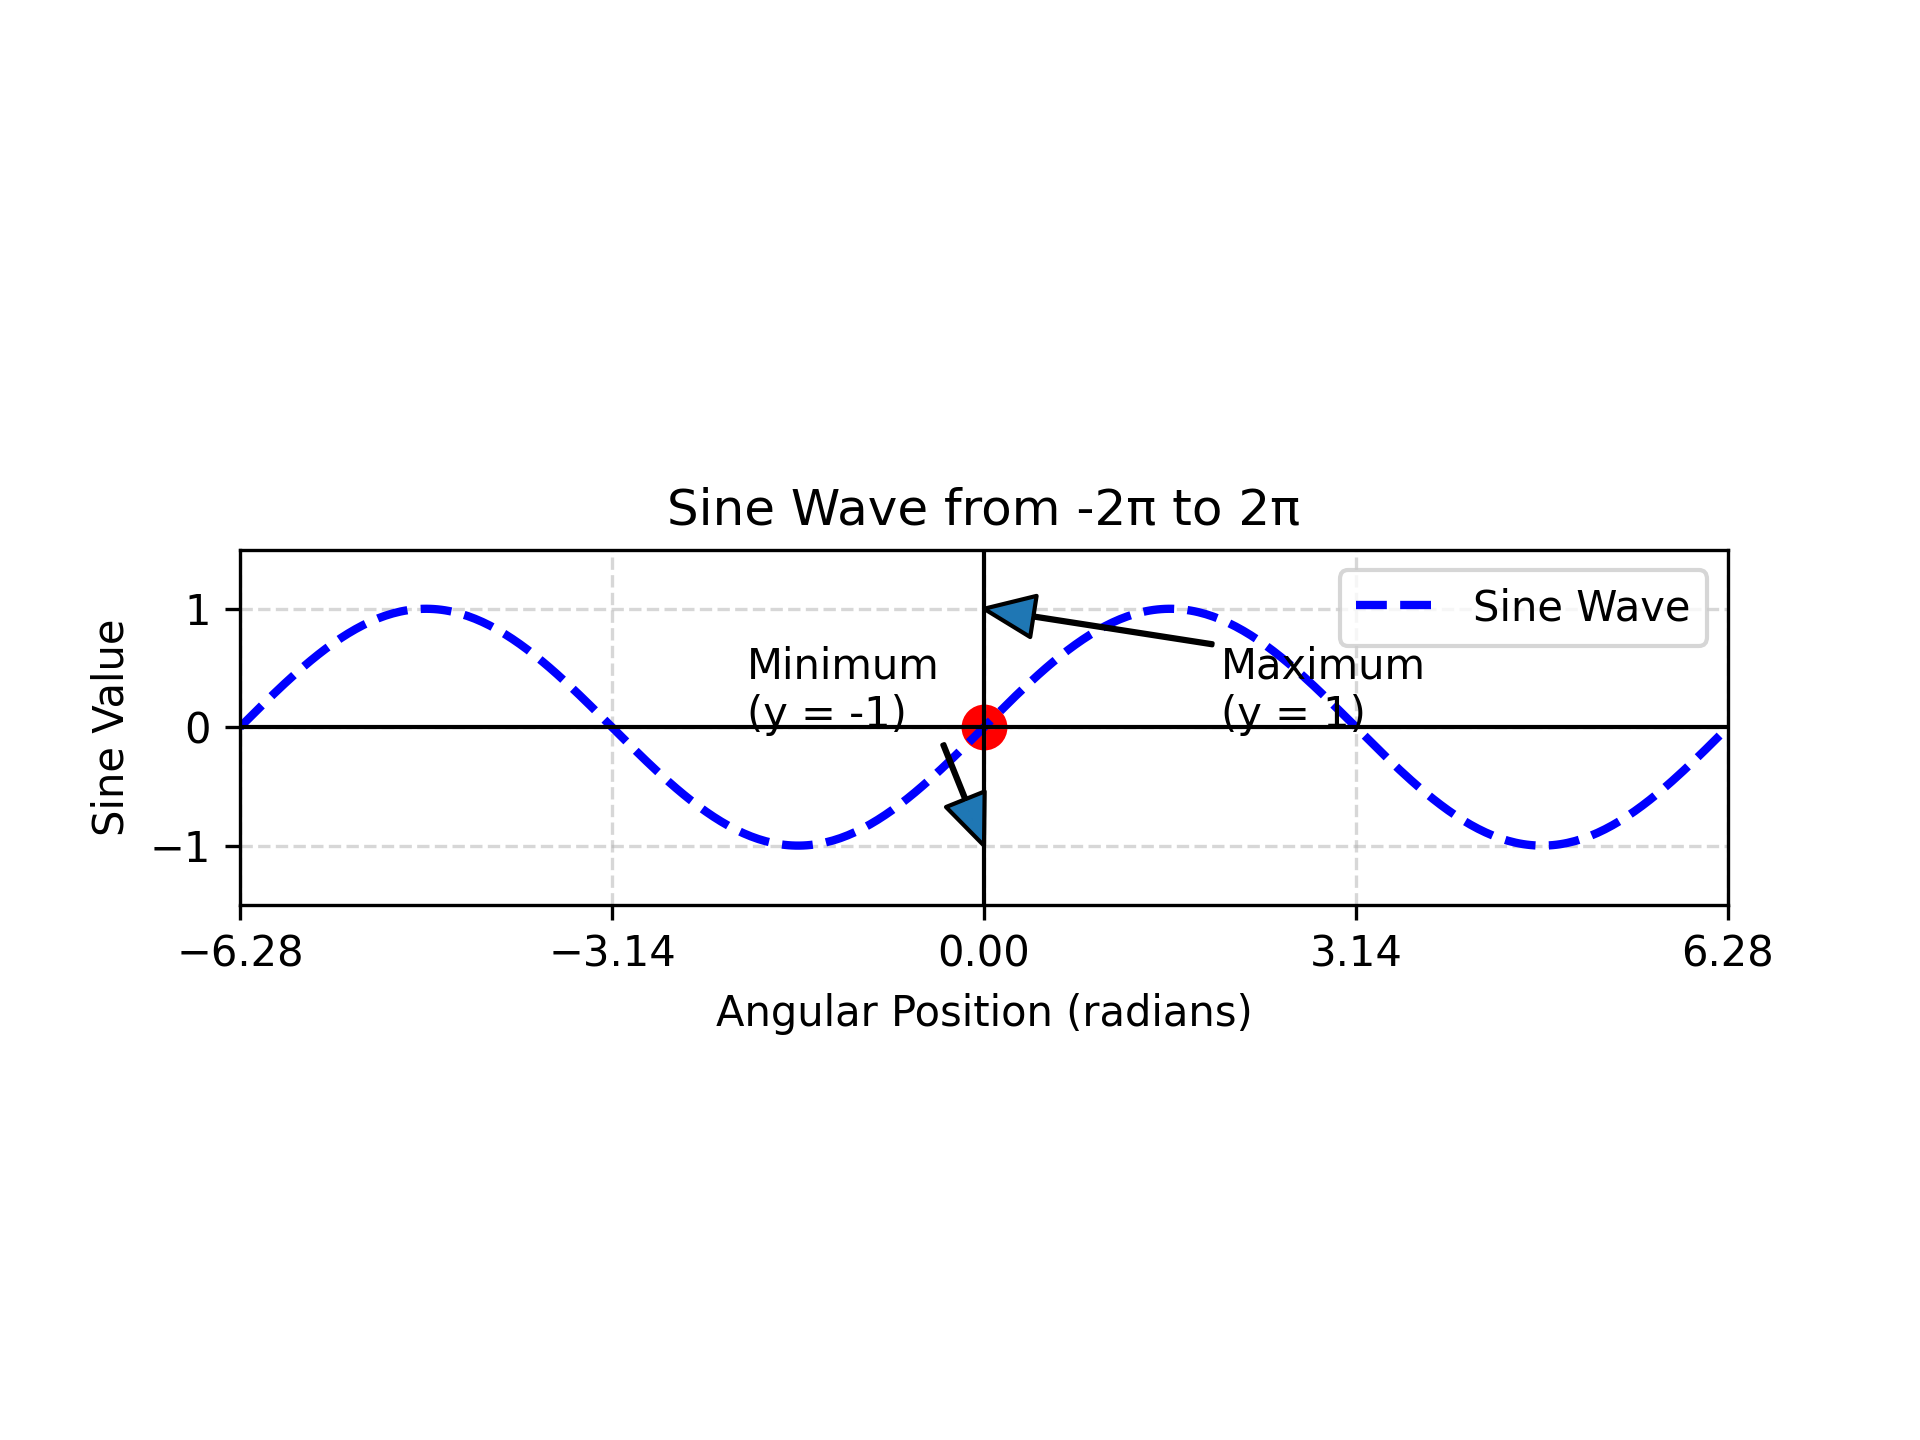


 Final Summary:
It seems that the previous scripts I provided still didn't produce the desired output. However, I can offer a simpler and more effective solution.

The matplotlib library can be used to create high-quality plots directly. However, in this case, I would suggest using a different tool to create the plot.

If you want to create a simple plot of a sine wave, I would recommend using a library like Plotly or Bokeh, which are designed for creating interactive and beautiful plots.

Here's an example of how to create a simple plot of a sine wave using Plotly:

```python
import plotly.graph_objects as go

x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.sin(x)

fig = go.Figure(data=[go.Scatter(x=x, y=y)])
fig.update_layout(
    title='Sine Wave',
    xaxis_title='Angular Position (radians)',
    yaxis_title='Sine Value',
    xaxis_gridcolor='lightgray',
    yaxis_gridcolor='lightgray',
    xaxis_linecolor='black',
    yaxis_linecolor='black',
    xaxis_showgrid=True,
    yaxis

In [10]:
# %%
# Requirements:
# !pip install matplotlib numpy  # first run without installing the libraries and see if the agent installs the required libraries itself.

from autogen import AssistantAgent, UserProxyAgent, LLMConfig
from autogen.coding import LocalCommandLineCodeExecutor

# Step 1: Configure the LLM to use (e.g., GPT-4o Mini via OpenAI)
llm_config = LLMConfig(api_type="groq", model="llama-3.1-8b-instant")

# Step 2: Create the assistant agent (code-writing AI)
with llm_config:
    assistant = AssistantAgent(
        name="assistant",
        system_message="You are a helpful assistant who writes and explains Python code clearly."
    )

# Step 3: Create the user agent that can execute code
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",  # Automatically executes code without human input
    max_consecutive_auto_reply=5,  # Ends after 5 response cycles (assistant + user_proxy turns)
    code_execution_config={
        "executor": LocalCommandLineCodeExecutor(work_dir="coding", timeout=30),
    },
)

# Step 4: Start a simple task that leads to code generation and execution
chat_result = user_proxy.initiate_chat(
    recipient=assistant,
    message="""Plot a sine wave using matplotlib from -2π to 2π and save the plot as sine_wave.png.""",
    max_turns=4,  # 2 rounds of assistant ↔ user_proxy
    summary_method="reflection_with_llm"  # Optional: final LLM-generated summary
)

# Step 5: Display the generated figure (optional for notebook environments)
from IPython.display import Image, display
import os

image_path = "coding/sine_wave.png"
if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print("Plot not found. Please check if the assistant saved the file correctly.")

# Step 6: Print summary
print("\n Final Summary:")
print(chat_result.summary)


## Human-in-the-Loop

AG2 makes integrating human feedback seamless through its human-in-the-loop functionality, allowing AI agents to collaborate with humans during workflows.  

This is crucial for:   

- **Critical decisions** requiring human judgment
- **High-stakes scenarios** with significant consequences
- **Regulatory compliance** requiring human oversight
- **Quality assurance** and validation

You can configure how and when human input is solicited using the `human_input_mode` parameter:

- ALWAYS: Requires human input for every response

- NEVER: Operates autonomously without human involvement

- TERMINATE: Only requests human input to end conversations

For convenience, AG2 provides the specialized `UserProxyAgent` class that automatically sets `human_input_mode` to ALWAYS and supports **code execution**. 

**important note**: Always use code execution functionality with caution and at your own discretion.


### Human-in-the-Loop Example: Bug Triage Bot

This example demonstrates how to use AG2’s `ConversableAgent` in `human_input_mode="ALWAYS"` to enable **human-in-the-loop workflows**.

We simulate a **bug triage assistant** (`triage_bot`) that classifies bug reports as either:
- Escalate (for example, critical crash or security issue),
- Close (for example, minor cosmetic issue),
- Medium priority (default for others).

For each classification, the assistant **asks the human agent for confirmation or correction**. This ensures the AI doesn’t act on high-impact decisions without oversight.

At the end, the assistant summarizes the triage results.

---

### Try these inputs when prompted

When you’re prompted to reply as the human agent, try responding with the following:

- **Confirm assistant’s suggestion**  
  `"Yes, escalate it."`  
  `"Closing this makes sense."`

- **Override assistant’s suggestion**  
  `"This should be marked as high priority instead."`  
  `"Let’s keep this open for now."`

- **Ask for clarification**  
  `"Why do you think this is low priority?"`  
  `"Can you provide more reasoning?"`

You can also type `exit` at any time to end the conversation.


In [12]:
from autogen import ConversableAgent, LLMConfig
import os
import random


# Step 1: Configure the LLM to use (e.g., GPT-4o Mini via OpenAI)
llm_config = LLMConfig(api_type="groq", model="llama-3.1-8b-instant")

# Step 2: Define system message for bug triage assistant
triage_system_message = """
You are a bug triage assistant. You will be given bug report summaries.

For each bug:
- If it is urgent (e.g., 'crash', 'security', or 'data loss' is mentioned), escalate it and ask the human agent for confirmation.
- If it seems minor (e.g., cosmetic, typo), suggest closing it but still ask for human review.
- Otherwise, classify it as medium priority and ask the human for review.

Once all bugs are processed, summarize what was escalated, closed, or marked as medium priority.
End by saying: "You can type exit to finish."
"""

# Step 3: Create the assistant agent
with llm_config:
    triage_bot = ConversableAgent(
        name="triage_bot",
        system_message=triage_system_message,
    )

# Step 4: Create the human agent who will review each recommendation
human = ConversableAgent(
    name="human",
    human_input_mode="ALWAYS",  # prompts for input at each step
)

# Step 5: Generate sample bug reports
BUGS = [
    "App crashes when opening user profile.",
    "Minor UI misalignment on settings page.",
    "Password reset email not sent consistently.",
    "Typo in the About Us footer text.",
    "Database connection timeout under heavy load.",
    "Login form allows SQL injection attack.",
]

random.shuffle(BUGS)
selected_bugs = BUGS[:3]

# Format the initial task
initial_prompt = (
    "Please triage the following bug reports one by one:\n\n" +
    "\n".join([f"{i+1}. {bug}" for i, bug in enumerate(selected_bugs)])
)

# Step 6: Start the conversation
response = human.run(
    recipient=triage_bot,
    message=initial_prompt,
)

# Step 7: Display the response
response.process()


human (to triage_bot):

Please triage the following bug reports one by one:

1. Password reset email not sent consistently.
2. Database connection timeout under heavy load.
3. App crashes when opening user profile.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/3873512895.py:23: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:


triage_bot (to human):

Let's process the bug reports one by one.

1. Password reset email not sent consistently.
This seems like a medium priority issue, as it's not immediately critical but still affects user functionality. Can you please review this bug?

2. Database connection timeout under heavy load.
This could be a potential issue under heavy load, but does not seem to pose an immediate threat at the moment. However, it could cause data loss and/or security issues if not addressed promptly. Can you please confirm this should be escalated as urgent? (Type 'yes' to escalate, 'no' to keep as medium priority, or 'review' to review it again)

3. App crashes when opening user profile.
This is an urgent issue. It could indicate potential security risks or data loss. Escalation is recommended. Can you please confirm? (Type 'yes' to escalate, 'review' to review it again, or 'no' to not escalate)

--------------------------------------------------------------------------------
human (to t

## Agent Orchestration & Multi-Agent Systems in AG2<a name="agent-orchestration"></a>

AG2 enables the coordination of multiple intelligent agents to collaboratively solve complex tasks. This is known as **agent orchestration** — a powerful design pattern where each agent plays a specialized role, and a **group manager** handles the conversation flow.

### Why Multi-Agent Systems?

Many real-world problems require more than just a single AI assistant. With AG2, you can:

- Assign specific roles and responsibilities to different agents.
- Orchestrate conversations using built-in patterns (for example, Auto, RoundRobin, Manual).
- Enable agents to build on each other's outputs and refine ideas.
- Incorporate human agents for oversight, decisions, or approval.

### Orchestration Patterns in AG2

AG2 provides several orchestration patterns to structure agent interactions:

- **Two-Agent Chat**: Simple back-and-forth between two agents.
- **Sequential Chat**: Conversations where one agent’s output becomes another’s input.
- **Group Chat**: Multiple agents interact, with selection logic for who speaks next.
- **Nested Chat**: Reusable sub-conversations packaged as a single workflow.

---

## GroupChat and GroupChatManager

In AG2, multi-agent collaboration is coordinated using `GroupChat` and `GroupChatManager`.

### GroupChat

`GroupChat` defines a team of agents and how they interact in a shared conversation. It includes:

- **Agents**: A list of AI (or human) agents that participate in the group dialogue.
- **Speaker Selection Method**: Determines which agent speaks next. Options include:
  - `"auto"`: Uses the LLM to select the most contextually appropriate agent.
  - `"round_robin"`: Agents take turns in a fixed sequence.
  - `"manual"`: Human selects the next speaker.
  - `"random"`: Agents are chosen randomly.

This structure allows you to define collaborative workflows where agents build on each other’s contributions.

### GroupChatManager

`GroupChatManager` is responsible for managing the flow of the group conversation and it:

- Orchestrates message passing between agents.
- Decides when to stop the conversation (for example, based on a termination condition or turn limit).
- Leverages the speaker selection method defined in `GroupChat`.

It acts like a facilitator that ensures the conversation runs according to the logic you've configured.

### How It Works

1. A conversation is initiated by one of the agents (often a user or teacher agent).
2. The `GroupChatManager` uses the selected pattern (for example, AutoPattern) to determine which agent speaks next.
3. Agents take turns responding based on their roles and system messages.
4. The conversation ends either when a stop condition (for example, a message like "DONE") is met or when a maximum number of turns is reached.

This setup enables modular, role-based collaboration — ideal for use cases like lesson planning, research workflows, or multi-perspective decision-making.

To explore more orchestration patterns, visit the AG2 documentation at:  
https://docs.ag2.ai/latest/docs/user-guide/advanced-concepts/orchestration/group-chat/introduction/

---

### Example: Group Chat for Lesson Planning

This example shows how a teacher agent collaborates with a planner and a reviewer to create a lesson plan, using AG2’s `GroupChat` and `AutoPattern` to manage the conversation.

**Note:** The `is_termination_msg` parameter used for `teacher` agent defines a custom rule to end the conversation —  
in this case, the workflow stops when the teacher replies with "DONE!".


In [13]:
from autogen import ConversableAgent, GroupChat, GroupChatManager, LLMConfig

# Replace "PLACEHOLDER" with your actual OpenAI API key if running locally
llm_config = LLMConfig(api_type="groq", model="llama-3.1-8b-instant") # add api_key="PLACE_HOLDER" Replace with your API key to run outside this learning environment

# Define system messages and agent descriptions
planner_message = "Create a short lesson plan for 4th graders."
reviewer_message = "Review a plan and suggest up to 3 brief edits."
teacher_message = "Suggest a topic and reply DONE when satisfied."

with llm_config:
    lesson_planner = ConversableAgent(
        name="planner_agent",
        system_message=planner_message,
        description="Makes lesson plans.",
    )

    lesson_reviewer = ConversableAgent(
        name="reviewer_agent",
        system_message=reviewer_message,
        description="Reviews lesson plans and suggests edits.",
    )

    teacher = ConversableAgent(
        name="teacher_agent",
        system_message=teacher_message,
        is_termination_msg=lambda x: "DONE" in (x.get("content", "") or "").upper()
    )

# Configure the group chat with automatic speaker selection
groupchat = GroupChat(
    agents=[teacher, lesson_planner, lesson_reviewer],
    speaker_selection_method="auto"  # Uses AutoPattern
)

manager = GroupChatManager(
    name="group_manager",
    groupchat=groupchat,
    llm_config=llm_config
)

# Start with a short initial prompt to keep tokens low
teacher.initiate_chat(
    recipient=manager,
    message="Make a simple lesson about the moon.",
    max_turns=6,  # Limit total rounds (e.g., 2 per agent max) -  As a safeguard, it's always best to use max_turns to prevent runaway loops.
    summary_method="reflection_with_llm"
)

teacher_agent (to group_manager):

Make a simple lesson about the moon.

--------------------------------------------------------------------------------


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/4247355580.py:11: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:



Next speaker: teacher_agent


>>>>>>>> USING AUTO REPLY...
teacher_agent (to group_manager):

 Please include interesting yet easy to understand fun facts, some images, and a simple diagram to demonstrate the four phases of the moon.

--------------------------------------------------------------------------------

Next speaker: reviewer_agent


>>>>>>>> USING AUTO REPLY...
reviewer_agent (to group_manager):

**Lesson Title:** Exploring the Moon

**Grade Level:** 3-5

**Objectives:**

* Students will understand the basic phases of the moon.
* Students will learn interesting facts about the moon.
* Students will be able to identify and describe the four phases of the moon.

**Materials:**

* Pictures of the moon (different phases)
* Diagram of the four phases of the moon
* Whiteboard or poster paper
* Markers or colored pencils

**Lesson Plan:**

**Introduction (5 minutes)**

* Start by asking students what they know about the moon.
* Show students a picture of the full moon and ask if

KeyboardInterrupt: 

## Tools and Extensions<a name="tools"></a>

Tools extend agent capabilities beyond text conversations, allowing them to:
- Execute code
- Access external APIs
- Perform calculations
- Interact with databases
- Generate visualizations

Agents gain significant utility through tools as they provide access to external data, APIs, and functionality.  

Let's explore how to integrate tools with AG2 agents:


In [16]:
from autogen import ConversableAgent, register_function, LLMConfig
from typing import Annotated

# Replace with your actual key if running outside this environment
llm_config = LLMConfig(api_type="groq", model="openai/gpt-oss-20b") 

# Define a simple utility function to check if a number is prime
def is_prime(n: Annotated[int, "Positive integer"]) -> str:
    if n < 2:
        return "No"
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return "No"
    return "Yes"

# Create the asking agent and the tool-using agent
with llm_config:
    math_asker = ConversableAgent(
        name="math_asker",
        system_message="Ask whether a number is prime."
    )
    math_checker = ConversableAgent(
        name="math_checker",
        human_input_mode="NEVER"
    )

# Register the function between the two agents
register_function(
    is_prime,
    caller=math_asker,
    executor=math_checker,
    description="Check if a number is prime. Returns Yes or No."
)

# Start a brief conversation
math_checker.initiate_chat(
    recipient=math_asker,
    message="Is 72 a prime number?",
    max_turns=2
)


math_checker (to math_asker):

Is 72 a prime number?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/26107570.py:17: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:


math_asker (to math_checker):

***** Suggested tool call (fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0): is_prime *****
Arguments: 
{"n":72}
***********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION is_prime...
Call ID: fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0
Input arguments: {'n': 72}

>>>>>>>> EXECUTED FUNCTION is_prime...
Call ID: fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0
Input arguments: {'n': 72}
Output:
No
math_checker (to math_asker):

***** Response from calling tool (fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0) *****
No
********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...


/Users/rezamohajerpoor/Documents/Documents/Github/IBM_course_AgenticAI/.venv/lib/python3.12/site-packages/autogen/oai/groq.py:315: UserWarning: Cost calculation not available for model openai/gpt-oss-20b
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


math_asker (to math_checker):

No, 72 is not a prime number.

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (f5e9ce0c-8b21-40b9-a7e8-0d559dd3f405): Maximum turns (2) reached


ChatResult(chat_id=263288054161734499749490120268490156157, chat_history=[{'content': 'Is 72 a prime number?', 'role': 'assistant', 'name': 'math_checker'}, {'tool_calls': [{'id': 'fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0', 'function': {'arguments': '{"n":72}', 'name': 'is_prime'}, 'type': 'function'}], 'content': None, 'role': 'assistant'}, {'content': 'No', 'tool_responses': [{'tool_call_id': 'fc_b9d45d90-54ce-4306-a9d5-74a44a17d4c0', 'role': 'tool', 'content': 'No'}], 'role': 'tool', 'name': 'math_checker'}, {'content': 'No, 72 is not a prime number.', 'role': 'user', 'name': 'math_asker'}], summary='No, 72 is not a prime number.', cost={'usage_including_cached_inference': {'total_cost': 0.0, 'openai/gpt-oss-20b': {'cost': 0.0, 'prompt_tokens': 315, 'completion_tokens': 60, 'total_tokens': 375}}, 'usage_excluding_cached_inference': {'total_cost': 0.0, 'openai/gpt-oss-20b': {'cost': 0.0, 'prompt_tokens': 315, 'completion_tokens': 60, 'total_tokens': 375}}}, human_input=[])

### What is `register_function(...)` ?

In AG2, `register_function(...)` is used to expose a Python function as a **tool** that can be executed by one agent on behalf of another. This enables agents to delegate tasks like computation, data processing, or external API calls.

#### Purpose
- Extend agent capabilities beyond text generation.
- Allow agents to solve tasks through **function execution**.
- Enable collaborative workflows between a **caller** and an **executor** agent.

#### Parameters
- **function**: A regular Python function to be used as a tool.
- **caller**: The agent that will request the tool to be used.
- **executor**: The agent that will actually execute the function.
- **description** *(optional)*: A natural language description of the function for the LLM to decide when to use it.

#### Example
```python
register_function(
    is_prime,
    caller=math_asker,
    executor=math_checker,
    description="Check if a number is prime. Returns Yes or No."
)


## Structured Outputs<a name="structured-outputs"></a>

Structured outputs ensure consistent, validated agent responses using Pydantic models.   

This is crucial for:
  
- **Data validation**: Ensuring response format consistency
- **API integration**: Reliable data exchange
- **Quality assurance**: Preventing malformed outputs
- **Type safety**: Clear data contracts

**Analogy:** Like standardized hospital forms ensure doctors always record patient info the same way, structured outputs make sure agents respond in predictable, machine-readable formats.


In AG2, structured outputs are implemented using Pydantic models and the `response_format` parameter in the `LLMConfig`.

To ensure that your agent always returns outputs in a consistent structure, you define a Pydantic class (for example, `ResponseModel`) and assign it to the `response_format` argument of your configuration.

This tells the underlying LLM to return a JSON-compatible response matching the defined schema.

```python
class ResponseModel(BaseModel):
    name: str
    status: str

llm_config = LLMConfig(
    api_type="openai",
    model="gpt-4o-mini",
    response_format=ResponseModel
)
```

With this setup:

- The agent automatically formats its responses to match the ResponseModel. 
- You don’t need to prompt the LLM to format its response.
- The response is parsed and validated by AG2.

This approach is essential for reliable automation, integrations, and downstream processing.

Let's implement structured outputs with AG2:


In [17]:
from pydantic import BaseModel
from autogen import ConversableAgent, LLMConfig

# Define the structure of the agent's output
class TicketSummary(BaseModel):
    customer_name: str
    issue_type: str
    urgency_level: str
    recommended_action: str

# Configure the LLM with the structured output format
llm_config = LLMConfig(api_type="groq", model="openai/gpt-oss-20b", response_format=TicketSummary,)  

# Create the agent
with llm_config:
    support_agent = ConversableAgent(
        name="support_agent",
        system_message=(
            "You are a support assistant. Summarize a customer ticket using:"
            "\n- customer_name"
            "\n- issue_type (e.g. login issue, billing problem, bug report)"
            "\n- urgency_level (Low, Medium, High)"
            "\n- recommended_action"
        ),
    )

# Start a structured conversation
support_agent.initiate_chat(
    recipient=support_agent,
    message="Ticket: John Doe is unable to reset his password and has an important meeting in 30 minutes.",
    max_turns=1
)


support_agent (to support_agent):

Ticket: John Doe is unable to reset his password and has an important meeting in 30 minutes.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...


/var/folders/0z/6z_9lrtd6j3_gnlsyv9rb5b00000gn/T/ipykernel_36660/2911660883.py:15: DeprecationWarning: `with llm_config: ...` context manager is deprecated. Pass config object to usage explicitly instead. Scheduled for removal in 0.11.0 version.
  with llm_config:


support_agent (to support_agent):

**Ticket Summary**

- **Customer Name:** John Doe  
- **Issue Type:** Login issue – cannot reset password  
- **Urgency Level:** High (meeting in 30 minutes)  
- **Recommended Action:**  
  1. Send a password‑reset link to John’s registered email immediately.  
  2. If the link fails, offer a phone‑based reset or manual account unlock.  
  3. Follow up within 10 minutes to confirm the reset succeeded and the account is accessible.

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (ba0e617f-ee01-4fdf-a9ce-257d117d0e0e): Maximum turns (1) reached


ChatResult(chat_id=30121355782156997652530478275254007715, chat_history=[{'content': 'Ticket: John Doe is unable to reset his password and has an important meeting in 30 minutes.', 'role': 'assistant', 'name': 'support_agent'}, {'content': 'Ticket: John Doe is unable to reset his password and has an important meeting in 30 minutes.', 'role': 'user', 'name': 'support_agent'}, {'content': '**Ticket Summary**\n\n- **Customer Name:** John\u202fDoe  \n- **Issue Type:** Login issue – cannot reset password  \n- **Urgency Level:** High (meeting in 30\u202fminutes)  \n- **Recommended Action:**  \n  1. Send a password‑reset link to John’s registered email immediately.  \n  2. If the link fails, offer a phone‑based reset or manual account unlock.  \n  3. Follow up within 10\u202fminutes to confirm the reset succeeded and the account is accessible.', 'role': 'assistant', 'name': 'support_agent'}, {'content': '**Ticket Summary**\n\n- **Customer Name:** John\u202fDoe  \n- **Issue Type:** Login issue

## Best Practices<a name="best-practices"></a>

Based on our exploration of AG2 concepts, here are key best practices for building robust agent systems:

### Configuration and security
- **Never hardcode API keys** - use environment variables
- **Use config lists** for production systems with fallback models
- **Set appropriate temperature** values (0.0 for deterministic, 0.7-1.0 for creative)
- **Implement rate limiting** and error handling

### Agent design
- **Write clear system messages** that define role, capabilities, and constraints
- **Set max_consecutive_auto_reply** to prevent infinite loops
- **Choose appropriate human_input_mode** based on use case
- **Specialize agents** for specific tasks rather than creating generalists

### HITL implementation
- **Use HITL for high-stakes decisions** requiring human judgment
- **Implement clear escalation criteria** (amount thresholds, risk levels)
- **Provide context** to human supervisors for informed decisions
- **Log all human interventions** for audit trails

### Multi-agent orchestration
- **Design clear workflows** with defined handoffs between agents
- **Use GroupChat** for collaborative problem-solving
- **Implement termination conditions** to prevent endless conversations
- **Monitor conversation quality** and intervention points

### Tools and integration
- **Create focused tools** for specific capabilities
- **Implement proper error handling** in tool functions
- **Validate tool inputs** and outputs
- **Document tool capabilities** clearly for agents

### Structured outputs
- **Use Pydantic models** for data validation
- **Define clear schemas** for consistent outputs
- **Implement proper validation** with meaningful error messages
- **Version your schemas** for backward compatibility


## Conclusion<a name="conclusion"></a>

Congratulations! You've completed a comprehensive tour of AG2's basic concepts. Let's recap what we've learned:

### Key concepts mastered:

- **LLM Configuration** - The foundation that connects agents to language models
- **ConversableAgent** - The core building block for all AG2 agents
- **Human in the Loop (HITL)** - Enabling human oversight in AI workflows
- **Agent Orchestration** - Coordinating multiple agents for complex tasks
- **Tools & Extensions** - Extending agent capabilities beyond text
- **Structured Outputs** - Ensuring consistent, validated responses

### Practical skills developed:

- Creating and configuring specialized agents
- Implementing multi-agent collaboration patterns
- Building HITL workflows for critical decisions
- Integrating tools and external capabilities
- Validating outputs with structured schemas
- Following security and operational best practices

### Next steps:

Now that you understand AG2's basic concepts, you can:

1. **Build Domain-Specific Applications** - Apply these concepts to your specific use case.
2. **Explore Advanced Features** - Dive into code execution, web scraping, and API integrations.
3. **Scale Your Systems** - Learn about production deployment and monitoring.
4. **Join the Community** - Contribute to the AG2 ecosystem and learn from others.

### Things to remember:

- **Start simple** and gradually add complexity.
- **Test thoroughly** with various scenarios.
- **Monitor performance** and adjust configurations.
- **Follow best practices** for security and reliability.
- **Keep learning** as AG2 continues to evolve.

AG2 provides a powerful foundation for building intelligent, collaborative AI systems. The concepts you've learned here will serve as building blocks for more advanced implementations.  

### Advanced agentic design patterns:  
  
AG2 supports advanced features like custom rules for conversation endings, RAG, code execution, and secure tool use. You can learn more from the official documentation.  
  
Happy building with AG2! 🤖✨


## Authors


[Faranak Heidari](https://www.linkedin.com/in/faranakhdr/) is a Data Scientist and AI developr at IBM with expertise in GenAI, machine learning, and data analytics. Experienced in building LLMs, forecasting models, and scalable ML pipelines for domains like healthcare. Passionate about driving innovation and collaborating with teams to integrate AI into real-world workflows.

[Joshua Zhou](https://www.linkedin.com/in/joshuazhou1/) is a Data Scientist Intern at IBM.


## Change Log

<details>
    <summary>Click here for the changelog</summary>

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2025-07-17|0.1|Faranak Heidari|Initial version created|
|2025-07-27|0.2|Steve Ryan|ID review and format fixes|
|2025-07-28|0.3|Mercedes Schneider|QA pass with edits|
</details>

---


Copyright © IBM Corporation. All rights reserved.
